In [78]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 

%matplotlib inline

## Reading and Preparing Data

Fortunately we have clean data. No need for cleaning

In [79]:
rangeOfGameNumbers = [i for i in range(1,71)]
rangeOfRedNumbers = [i for i in range(1,27)]

In [80]:
df = pd.read_csv('pb.csv')

In [81]:
print(df.head())
df.shape

        Date   A   B   C   D   E   F
0  3/21/2020   2  23  40  59  69  13
1  3/18/2020  15  27  44  59  63   8
2  3/14/2020   9  23  26  30  32   8
3  3/11/2020   4  29  49  50  67   2
4   3/7/2020   7  15  21  33  62  23


(232, 7)

In [82]:
origDf = df.drop(['Date','F'],axis=1)
numDf = df.drop(['Date','F'],axis=1).stack().reset_index(drop=True)
redDf = df.loc[:,'F'].reset_index(drop=True)

print(numDf.shape)
print(redDf.shape)

(1160,)
(232,)


## Analyzing Data
Lottery mathematics is used to calculate probabilities of winning or losing a lottery game. It is based heavily on combinatorics, particularly the twelvefold way and combinations without replacement.

In each game, players select five numbers from a set of 69 white balls and one number from 26 red Powerballs; the red ball number can be the same as one of the white balls. The drawing order of the five white balls is irrelevant; all tickets show the white ball numbers in ascending order. Players cannot use the drawn Powerball to match two of their white numbers, or vice versa.

The odds of winning are given below
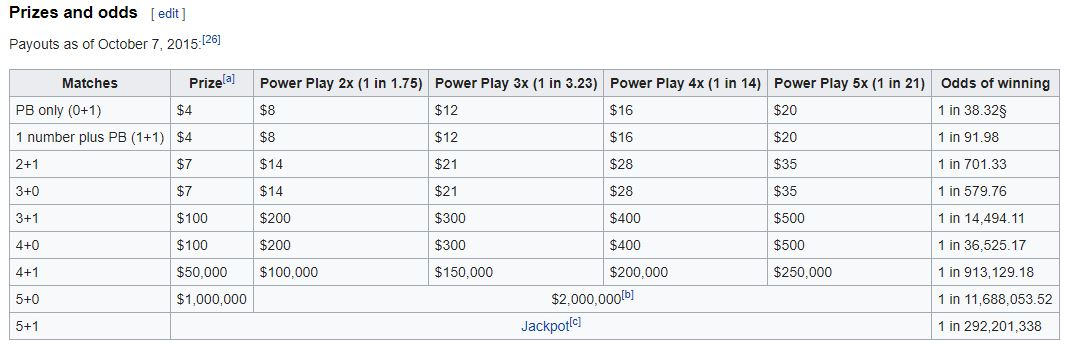

ref: [https://en.wikipedia.org/wiki/Lottery_mathematics]

So, here we find that the if we ignore the match for PowerBall, we increase the probability of winning, but for less money

### We will look at the distribution of numbers

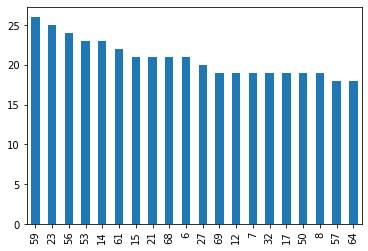

In [83]:
p=numDf.value_counts().nlargest(20).plot(kind='bar')

In [84]:
totalCount = numDf.shape[0]
numberArrayCounts = numDf.value_counts()/totalCount
numbersArray = numberArrayCounts.index
numbersProbabilities = numberArrayCounts.values

print(numbersArray)
print(numbersProbabilities)

Int64Index([59, 23, 56, 53, 14, 61, 15, 21, 68,  6, 27, 69, 12,  7, 32, 17, 50,
             8, 57, 64, 29,  3, 42, 43, 45,  9, 25, 24, 20, 36,  5,  1, 47, 39,
            67, 62, 41, 38, 44, 37,  4, 66, 54, 19, 26, 35, 30,  2, 63, 10, 28,
            55, 34, 11, 46, 18, 49, 22, 51, 60, 65, 33, 16, 52, 58, 13, 31, 40,
            48],
           dtype='int64')
[0.02241379 0.02155172 0.02068966 0.01982759 0.01982759 0.01896552
 0.01810345 0.01810345 0.01810345 0.01810345 0.01724138 0.01637931
 0.01637931 0.01637931 0.01637931 0.01637931 0.01637931 0.01637931
 0.01551724 0.01551724 0.01551724 0.01551724 0.01551724 0.01551724
 0.01551724 0.01465517 0.01465517 0.01465517 0.01465517 0.01465517
 0.01465517 0.01465517 0.01465517 0.01465517 0.01465517 0.01465517
 0.01465517 0.01465517 0.01465517 0.0137931  0.0137931  0.0137931
 0.0137931  0.0137931  0.0137931  0.01293103 0.01293103 0.01293103
 0.01293103 0.01293103 0.01293103 0.01293103 0.01206897 0.01206897
 0.01206897 0.01206897 0.01206897 0

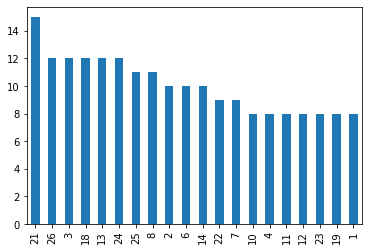

In [85]:
redDf.value_counts().nlargest(20).plot(kind='bar')

In [86]:
redProbabilitiesDf = redDf.value_counts()/(redDf.shape[0])
redNumbersArray = redProbabilitiesDf.index
redProbabilities = redProbabilitiesDf.values


In [87]:
expandedGameDf = df.copy().drop(['Date','F'],axis=1)
expandedGameDf.head()

,A,B,C,D,E
0,2,23,40,59,69
1,15,27,44,59,63
2,9,23,26,30,32
3,4,29,49,50,67
4,7,15,21,33,62


### Let us also look at the combination of Odd and Even numbers 

In [88]:
def countOdd(l):
    if len(l)==0: return 0      
    return l[0] % 2 + countOdd(l[1:])

def countEven(l):
    if len(l)==0: return 0       
    return (l[0]+1) % 2 + countEven(l[1:])

def getEvenOddCount(rowAr):
    return f'E{countEven(rowAr)}O{countOdd(rowAr)}'


In [89]:
getEvenOddCount([ 7, 22, 37, 43, 44, 22])

'E3O3'

In [90]:
expandedGameDf['OddEven']=[getEvenOddCount(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
expandedGameDf.head()

,A,B,C,D,E,OddEven
0,2,23,40,59,69,E2O3
1,15,27,44,59,63,E1O4
2,9,23,26,30,32,E3O2
3,4,29,49,50,67,E2O3
4,7,15,21,33,62,E1O4


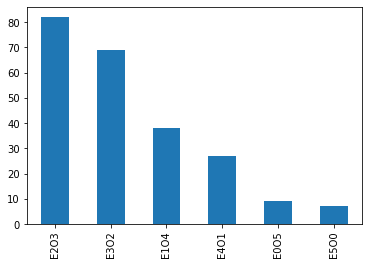

In [91]:
p=expandedGameDf['OddEven'].value_counts().plot(kind='bar')

In [92]:
oddEvenCounts = expandedGameDf['OddEven'].value_counts()

oddEvenCountProb = oddEvenCounts/totalCount
print(oddEvenCountProb)


E2O3    0.070690
E3O2    0.059483
E1O4    0.032759
E4O1    0.023276
E0O5    0.007759
E5O0    0.006034
Name: OddEven, dtype: float64


In [93]:
mostProbableOddEvenCount = oddEvenCounts.index[0]
print(mostProbableOddEvenCount)

E2O3


### We can also look at the spread of numbers
We will split the whole set of numbers to low, mid and high range

In [94]:
g1,g2,g3,g4 = np.array_split(rangeOfGameNumbers,4)

In [95]:
print(g1)
print(g2)
print(g3)
print(g4)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36]
[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53]
[54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


In [96]:
def countGroup(rowArr):
    g1Count = len(np.intersect1d(rowArr,g1))
    g2Count = len(np.intersect1d(rowArr,g2))
    g3Count = len(np.intersect1d(rowArr,g3))
    g4Count = len(np.intersect1d(rowArr,g4))
    
    return f'G1:{g1Count},G2:{g2Count},G3:{g3Count},G4:{g4Count}'

In [97]:
countGroup([3,4,5,6,7,8,99,45])

'G1:6,G2:0,G3:1,G4:0'

In [98]:
expandedGameDf['Spread']=[countGroup(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
expandedGameDf.head()

,A,B,C,D,E,OddEven,Spread
0,2,23,40,59,69,E2O3,"G1:1,G2:1,G3:1,G4:2"
1,15,27,44,59,63,E1O4,"G1:1,G2:1,G3:1,G4:2"
2,9,23,26,30,32,E3O2,"G1:1,G2:4,G3:0,G4:0"
3,4,29,49,50,67,E2O3,"G1:1,G2:1,G3:2,G4:1"
4,7,15,21,33,62,E1O4,"G1:2,G2:2,G3:0,G4:1"


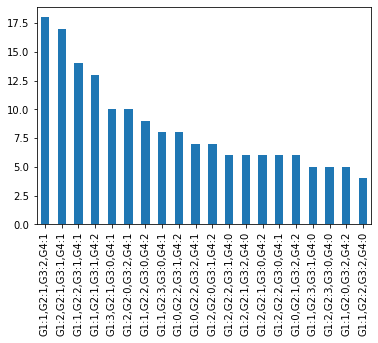

In [99]:
expandedGameDf['Spread'].value_counts().nlargest(20).plot(kind='bar')

Since none of the sections have significant count, lets combine the middle 2 sections to 1

In [100]:
def countGroupCombineMiddle(rowArr):
    g1Count = len(np.intersect1d(rowArr,g1))
    g2Count = len(np.intersect1d(rowArr,g2))
    g3Count = len(np.intersect1d(rowArr,g3))
    g4Count = len(np.intersect1d(rowArr,g4))
    
    return f'G1:{g1Count},G3:{g2Count+g3Count},G4:{g4Count}'

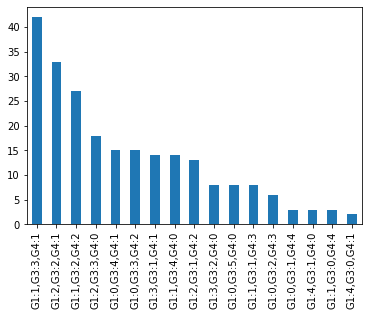

In [101]:
expandedGameDf['Spread']=[countGroupCombineMiddle(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Spread'].value_counts().nlargest(20).plot(kind='bar')

We see that highest probability is G1:1,G3:3,G2:1 followed by G1:1,G3:2,G2:1 and G1:1,G3:2,G2:2. Lets look at the latter two

In [102]:
expandedGameDf.loc[expandedGameDf['Spread']=='G1:1,G3:2,G4:2']

,A,B,C,D,E,OddEven,Spread
0,2,23,40,59,69,E2O3,"G1:1,G3:2,G4:2"
1,15,27,44,59,63,E1O4,"G1:1,G3:2,G4:2"
17,11,33,44,59,67,E1O4,"G1:1,G3:2,G4:2"
30,18,42,53,62,66,E4O1,"G1:1,G3:2,G4:2"
32,15,35,42,63,68,E2O3,"G1:1,G3:2,G4:2"
36,14,22,26,55,63,E3O2,"G1:1,G3:2,G4:2"
39,15,28,46,62,64,E4O1,"G1:1,G3:2,G4:2"
42,3,20,48,54,59,E3O2,"G1:1,G3:2,G4:2"
44,14,27,29,59,65,E1O4,"G1:1,G3:2,G4:2"
58,14,41,50,56,57,E3O2,"G1:1,G3:2,G4:2"


Lets see if we expand the mid section, if we can get a better probability

In [103]:
g11 = g1[:-5]
g22 = np.append(g1[-5:],g2)
g22 = np.append(g22, g3)
g22 = np.append(g22, g4[0:5])
g33 = g4[5:]

In [104]:
print(g11)
print(g22)
print(g33)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58]
[59 60 61 62 63 64 65 66 67 68 69 70]


In [105]:
def countGroupThree(rowArr):
    g1Count = len(np.intersect1d(rowArr,g11))
    g2Count = len(np.intersect1d(rowArr,g22))
    g3Count = len(np.intersect1d(rowArr,g33))
    
    return f'G1:{g1Count},G2:{g2Count},G3:{g3Count}'

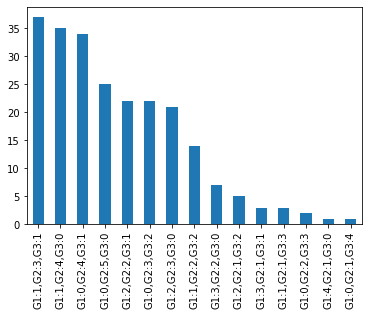

In [106]:
expandedGameDf['Spread']=[countGroupThree(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Spread'].value_counts().nlargest(20).plot(kind='bar')

What if we reduce the mid section

In [107]:
g111 = np.append(g1, g2[0:5])
g222 = np.append(g2[5:],g3[:-5])
g333 = np.append(g3[-5:], g4)

In [108]:
print(g111)
print(g222)
print(g333)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


In [109]:
def countGroupThreeLean(rowArr):
    g1Count = len(np.intersect1d(rowArr,g111))
    g2Count = len(np.intersect1d(rowArr,g222))
    g3Count = len(np.intersect1d(rowArr,g333))
    
    return f'G1:{g1Count},G2:{g2Count},G3:{g3Count}'

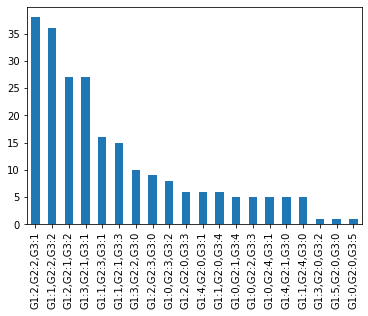

In [110]:
expandedGameDf['Spread']=[countGroupThreeLean(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Spread'].value_counts().nlargest(20).plot(kind='bar')

#### Let us pick a Spread Calculation method

In [165]:
spreadCalculationMethod = countGroup
#spreadCalculationMethod = countGroupThree
#spreadCalculationMethod = countGroupThreeLean
#spreadCalculationMethod = countGroupCombineMiddle


expandedGameDf['Spread']=[spreadCalculationMethod(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]

In [166]:
expandedGameDf.head()

,A,B,C,D,E,OddEven,Spread,Fadic,Consec,Regularity
0,2,23,40,59,69,E2O3,"G1:1,G2:1,G3:1,G4:2",4,0,0
1,15,27,44,59,63,E1O4,"G1:1,G2:1,G3:1,G4:2",1,0,0
2,9,23,26,30,32,E3O2,"G1:1,G2:4,G3:0,G4:0",3,0,0
3,4,29,49,50,67,E2O3,"G1:1,G2:1,G3:2,G4:1",1,1,0
4,7,15,21,33,62,E1O4,"G1:2,G2:2,G3:0,G4:1",3,0,0


In [167]:
spreadCounts = expandedGameDf['Spread'].value_counts()
spreadCountProb = spreadCounts/totalCount

mostProbableSpreadCount = spreadCounts.index[0]
print(mostProbableSpreadCount)

G1:1,G2:1,G3:2,G4:1


### Let's look at distribution of fadic numbers

In [168]:
def getFadicNumber(rowArr):
    n = rowArr.copy()
    while len(n) > 1:
        res = sum(int(c) for c in n)
        n = [x for x in str(res)]
    return n[0]
    
print(getFadicNumber([1,2,3,4,5,6]))

3


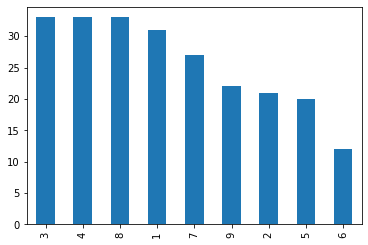

In [169]:
expandedGameDf['Fadic']=[getFadicNumber(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Fadic'].value_counts().plot(kind='bar')

In [170]:
fadicCounts = expandedGameDf['Fadic'].value_counts()
fadicProb = fadicCounts/totalCount

print(fadicProb)

3    0.028448
4    0.028448
8    0.028448
1    0.026724
7    0.023276
9    0.018966
2    0.018103
5    0.017241
6    0.010345
Name: Fadic, dtype: float64


#### Check for consecutive numbers

In [171]:
def checkConsecutive(l): 
    n = len(l) - 1
    return sum(np.diff(sorted(l)) == 1)

In [172]:
checkConsecutive([23,56,22,34,58])

1

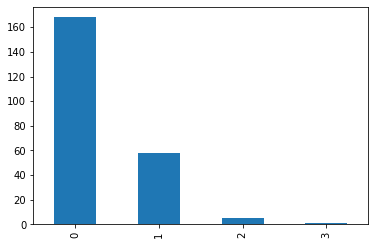

In [173]:
expandedGameDf['Consec']=[checkConsecutive(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Consec'].value_counts().plot(kind='bar')

We need to pick groups with non-consecutive numbers

#### Check for Regularity

Regularity checks for two things
* if there are numbers that are equally placed ( lke 23, 26, 29.. )
* if there are numbers that are progressing in equally placed way ( 1, 3 , 6, 10, 15..)

In [174]:
def checkRegularity1(l): 
    return sum(np.diff(np.diff(sorted(l)))==0)

In [175]:
def checkRegularity2(l):
    mm=np.diff(np.diff(sorted(l)))
    xx=[i for i in mm if i>0]
    return sum(np.diff(xx)==0)

In [176]:
def checkRegularity(l):
    return checkRegularity1(l) or checkRegularity2(l)

In [177]:
l1 = [1,2,3,4,5]
l2=[1,3,6,10,5]
l3=[24,55,63,2,33]

In [178]:
print(checkRegularity1(l1))
print(checkRegularity1(l2))
print(checkRegularity1(l3))


print(checkRegularity2(l1))
print(checkRegularity2(l2))
print(checkRegularity2(l3))


3
1
0
0
0
0


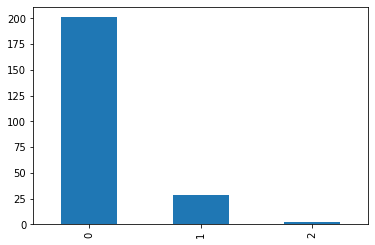

In [179]:
expandedGameDf['Regularity']=[checkRegularity(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Regularity'].value_counts().plot(kind='bar')

Look for rows with no regularity

#### Look for combinations

In [180]:
def listToString(numArr):
    s = [str(i) for i in numArr] 
    return (":".join(s))
    
def get3Combs(rowArr):
    return [ listToString(sorted(i))  for i in combinations(rowArr,3)]

print(get3Combs([6,4,8,3,7]))

['4:6:8', '3:4:6', '4:6:7', '3:6:8', '6:7:8', '3:6:7', '3:4:8', '4:7:8', '3:4:7', '3:7:8']


In [181]:
combThrees = []

[combThrees.extend(get3Combs(row.values)) for id,row in origDf.iterrows()]

print(combThrees[0:5])
print(len(combThrees))

['2:23:40', '2:23:59', '2:23:69', '2:40:59', '2:40:69']
2320


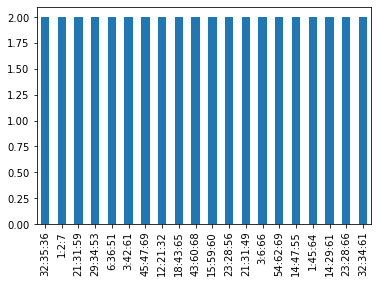

In [182]:
threeCombSeries = pd.Series(combThrees)
threeCombSeriesCount = threeCombSeries.value_counts()
p=threeCombSeriesCount.nlargest(20).plot(kind='bar')

In [183]:
threeCombSeriesCount.tail()

6:17:53     1
12:54:60    1
15:62:64    1
20:38:39    1
3:6:64      1
dtype: int64

In [184]:
def get2Combs(rowArr):
    return [ listToString(sorted(i))  for i in combinations(rowArr,2)]

print(get2Combs([6,4,8,3,7]))

['4:6', '6:8', '3:6', '6:7', '4:8', '3:4', '4:7', '3:8', '7:8', '3:7']


In [185]:
combTwos = []

[combTwos.extend(get2Combs(row.values)) for id,row in origDf.iterrows()]

print(combTwos[0:5])

['2:23', '2:40', '2:59', '2:69', '23:40']


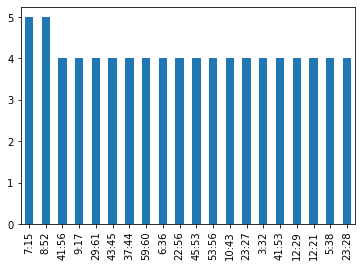

In [186]:
twoCombSeries = pd.Series(combTwos)
twoCombSeriesCount = twoCombSeries.value_counts()
p=twoCombSeriesCount.nlargest(20).plot(kind='bar')

In [187]:
combs=get2Combs([7,15,37,44,8])
sum(twoCombSeriesCount.index.isin(combs))

8

In [188]:
threeCombSeriesCountToUse = threeCombSeriesCount.loc[threeCombSeriesCount>=2]
twoCombSeriesCountToUse = twoCombSeriesCount.loc[twoCombSeriesCount>3]

print(threeCombSeriesCountToUse)
print('--------------')
print(twoCombSeriesCountToUse)

32:35:36    2
1:2:7       2
21:31:59    2
29:34:53    2
6:36:51     2
3:42:61     2
45:47:69    2
12:21:32    2
18:43:65    2
43:60:68    2
15:59:60    2
23:28:56    2
21:31:49    2
3:6:66      2
54:62:69    2
14:47:55    2
1:45:64     2
14:29:61    2
23:28:66    2
32:34:61    2
5:25:67     2
42:53:62    2
45:53:56    2
1:2:39      2
12:20:21    2
6:8:52      2
8:52:55     2
24:52:61    2
7:39:40     2
dtype: int64
--------------
7:15     5
8:52     5
41:56    4
9:17     4
29:61    4
43:45    4
37:44    4
59:60    4
6:36     4
22:56    4
45:53    4
53:56    4
10:43    4
23:27    4
3:32     4
41:53    4
12:29    4
12:21    4
5:38     4
23:28    4
14:55    4
49:59    4
1:45     4
53:57    4
8:27     4
45:56    4
3:6      4
49:50    4
25:67    4
23:56    4
1:27     4
17:26    4
2:39     4
dtype: int64


## Let us play!
 

In [189]:
#mostProbableNums = numDf.value_counts().nlargest(40).index[5:25]
#mostProbableNums = np.random.choice(numbersArray,30,False)
mostProbableNums = np.random.choice(numbersArray,25,False,numbersProbabilities)

In [190]:
print(mostProbableNums)


[35 29 48 10 43 38 68 66 64 12 53 30 55 23 15 61 26 57 47 25  6 36 49 50
 52]


In [191]:
predCombinations = [ i for i in combinations(mostProbableNums,5)]
len(predCombinations)

53130

In [192]:
predDf = pd.DataFrame(predCombinations)
predDf.columns = ['A','B','C','D','E']
predDf.head()

,A,B,C,D,E
0,35,29,48,10,43
1,35,29,48,10,38
2,35,29,48,10,68
3,35,29,48,10,66
4,35,29,48,10,64


In [193]:
def getNumberProbability(row,column):
    colVal = row[column]
    return numberArrayCounts[colVal] if numberArrayCounts.index.isin([colVal]).any() else 0

def colValuesAtoE(row):
    return [row['A'],row['B'],row['C'],row['D'],row['E']]


def getNumberCombinationProbability(row):
    return getNumberProbability(row,'A') * getNumberProbability(row,'B') * getNumberProbability(row,'C') * getNumberProbability(row,'D') * getNumberProbability(row,'E')

def getTwoCombsCount(row):
    rowValues = colValuesAtoE(row)
    combs = get2Combs(rowValues)
    return sum(twoCombSeriesCountToUse.index.isin(combs))

def getThreeCombsCount(row):
    rowValues = colValuesAtoE(row)
    combs = get3Combs(rowValues)
    return sum(threeCombSeriesCountToUse.index.isin(combs))

def getEvenOddCountProbability(row):
    rowOddEvenVal = getEvenOddCount(colValuesAtoE(row))
    return oddEvenCountProb[rowOddEvenVal] if oddEvenCountProb.index.isin([rowOddEvenVal]).any() else 0

def getSpreadProbability(row):
    rowSpreadVal = spreadCalculationMethod(colValuesAtoE(row))
    return spreadCountProb[rowSpreadVal] if spreadCountProb.index.isin([rowSpreadVal]).any() else 0

def getFadicProbability(row):
    rowFadicval =getFadicNumber(colValuesAtoE(row))
    return fadicProb[rowFadicval] if fadicProb.index.isin([rowFadicval]).any() else 0
    return fadicProb[rowFadicval]
    
print(getNumberCombinationProbability(predDf.loc[0]))
print(getThreeCombsCount(predDf.loc[0]))
print(getTwoCombsCount(predDf.loc[0]))
print(getEvenOddCountProbability(predDf.loc[0]))
print(getSpreadProbability(predDf.loc[0]))
print(getFadicProbability(predDf.loc[0]))


3.470863882369535e-10
0
1
0.0706896551724138
0.0034482758620689655
0.028448275862068967


In [194]:
extraData = []
extraDataColumns = ['Consec','Regularity','OddEven','Spread','Fadic','OddEvenProb','SpreadProb','NumCombProb','FadicProb','Comb3Count','Comb2Count']
def addExtraDataForRow(row):
    extraData.append([
        checkConsecutive(colValuesAtoE(row)),
        checkRegularity(colValuesAtoE(row)),
        getEvenOddCount(colValuesAtoE(row)),
        spreadCalculationMethod(colValuesAtoE(row)),
        getFadicNumber(colValuesAtoE(row)),
        getEvenOddCountProbability(row),
        getSpreadProbability(row),
        getNumberCombinationProbability(row),
        getFadicProbability(row),
        getThreeCombsCount(row),
        getTwoCombsCount(row)
    ])
    

[addExtraDataForRow(row) for idx, row in predDf.iterrows()]

extraDataDf = pd.DataFrame(extraData, columns=extraDataColumns)
predDf = pd.concat([predDf, extraDataDf], axis=1)

predDf = predDf.loc[predDf['Consec']==0].reset_index(drop=True)
predDf = predDf.loc[predDf['Regularity']==0].reset_index(drop=True)

predDf.head()

,A,B,C,D,E,Consec,Regularity,OddEven,Spread,Fadic,OddEvenProb,SpreadProb,NumCombProb,FadicProb,Comb3Count,Comb2Count
0,35,29,48,10,43,0,0,E2O3,"G1:1,G2:2,G3:2,G4:0",3,0.070690,0.003448,3.470864e-10,0.028448,0,1
1,35,29,48,10,38,0,0,E3O2,"G1:1,G2:2,G3:2,G4:0",7,0.059483,0.003448,3.278038e-10,0.023276,0,0
2,35,29,48,10,66,0,0,E3O2,"G1:1,G2:2,G3:1,G4:1",8,0.059483,0.012069,3.085212e-10,0.028448,0,0
3,35,29,48,10,64,0,0,E3O2,"G1:1,G2:2,G3:1,G4:1",6,0.059483,0.012069,3.470864e-10,0.010345,0,0
4,35,29,48,10,12,0,0,E3O2,"G1:2,G2:2,G3:1,G4:0",8,0.059483,0.005172,3.663690e-10,0.028448,0,1


In [195]:
#predDf['WinProb'] = predDf['SpreadProb'] #+ predDf['OddEvenProb'] + predDf['FadicProb']
#predDf['WinProb'] = 3 * predDf['SpreadProb'] + 2* predDf['OddEvenProb'] + 1 * predDf['FadicProb']
#predDf['WinProb'] = predDf['SpreadProb'] * predDf['OddEvenProb'] * predDf['FadicProb']
#predDf['WinProb'] = predDf['NumCombProb']*predDf['FadicProb']

predDf.head()

,A,B,C,D,E,Consec,Regularity,OddEven,Spread,Fadic,OddEvenProb,SpreadProb,NumCombProb,FadicProb,Comb3Count,Comb2Count
0,35,29,48,10,43,0,0,E2O3,"G1:1,G2:2,G3:2,G4:0",3,0.070690,0.003448,3.470864e-10,0.028448,0,1
1,35,29,48,10,38,0,0,E3O2,"G1:1,G2:2,G3:2,G4:0",7,0.059483,0.003448,3.278038e-10,0.023276,0,0
2,35,29,48,10,66,0,0,E3O2,"G1:1,G2:2,G3:1,G4:1",8,0.059483,0.012069,3.085212e-10,0.028448,0,0
3,35,29,48,10,64,0,0,E3O2,"G1:1,G2:2,G3:1,G4:1",6,0.059483,0.012069,3.470864e-10,0.010345,0,0
4,35,29,48,10,12,0,0,E3O2,"G1:2,G2:2,G3:1,G4:0",8,0.059483,0.005172,3.663690e-10,0.028448,0,1


In [196]:
#predSorted = predDf.sort_values(['SpreadProb','OddEvenProb','NumCombProb','FadicProb'],ascending=False).reset_index(drop=True)
#predSorted = predDf.sort_values(['OddEvenProb','SpreadProb','NumCombProb','FadicProb'],ascending=False).reset_index(drop=True)
#predSorted = predDf.sort_values(['Comb3Count','Comb2Count','OddEvenProb','SpreadProb','NumCombProb'],ascending=False).reset_index(drop=True)
predSorted = predDf.sort_values(['Comb3Count','Comb2Count','NumCombProb'],ascending=False).reset_index(drop=True)
predSorted.head(20)

,A,B,C,D,E,Consec,Regularity,OddEven,Spread,Fadic,OddEvenProb,SpreadProb,NumCombProb,FadicProb,Comb3Count,Comb2Count
0,29,12,61,6,36,0,0,E3O2,"G1:2,G2:2,G3:0,G4:1",9,0.059483,0.005172,1.278872e-09,0.018966,0,3
1,29,10,43,12,61,0,0,E2O3,"G1:2,G2:1,G3:1,G4:1",2,0.070690,0.014655,9.672141e-10,0.018103,0,3
2,29,12,53,23,61,0,0,E1O4,"G1:1,G2:2,G3:1,G4:1",7,0.032759,0.012069,2.059808e-09,0.023276,0,2
3,29,68,12,23,61,0,0,E2O3,"G1:1,G2:2,G3:0,G4:2",4,0.070690,0.007759,1.880694e-09,0.028448,0,2
4,29,12,23,15,61,0,0,E1O4,"G1:2,G2:2,G3:0,G4:1",5,0.032759,0.005172,1.880694e-09,0.017241,0,2
5,29,12,23,61,6,0,0,E2O3,"G1:2,G2:2,G3:0,G4:1",5,0.070690,0.005172,1.880694e-09,0.017241,0,2
6,53,23,57,6,36,0,0,E2O3,"G1:1,G2:2,G3:1,G4:1",4,0.070690,0.012069,1.759214e-09,0.028448,0,2
7,29,68,12,53,61,0,0,E2O3,"G1:1,G2:1,G3:1,G4:2",7,0.070690,0.011207,1.730239e-09,0.023276,0,2
8,29,12,53,15,61,0,0,E1O4,"G1:2,G2:1,G3:1,G4:1",8,0.032759,0.014655,1.730239e-09,0.028448,0,2
9,29,12,53,61,6,0,0,E2O3,"G1:2,G2:1,G3:1,G4:1",8,0.070690,0.014655,1.730239e-09,0.028448,0,2


In [197]:
predictions = predSorted#.loc[predSorted['WinProb'] == predSorted.loc[0,'WinProb']]
predList = predictions.loc[:,['A','B','C','D','E']]
predList

,A,B,C,D,E
0,29,12,61,6,36
1,29,10,43,12,61
2,29,12,53,23,61
3,29,68,12,23,61
4,29,12,23,15,61
...,...,...,...,...,...
35895,48,30,55,26,52
35896,35,48,10,30,52
35897,35,48,10,55,52
35898,35,48,30,55,52


In [198]:
predList.shape

(35900, 5)

In [199]:
def calcPrizeAmount(yourPick, yourRed, winningNumbers, winningRed):
    numMatching = len(np.intersect1d(yourPick,winningNumbers))
    isRedMatching = yourRed==winningRed
    if numMatching==0:
        if isRedMatching:
            return 4
        else:
            return 0
    elif numMatching==1:
        if isRedMatching:
            return 4
        else:
            return 0
    elif numMatching==2:
        if isRedMatching:
            return 7
        else:
            return 0
    elif numMatching==3:      
        if isRedMatching:
            return 100
        else:
            return 7
    elif numMatching==4:      
        if isRedMatching:
            return 50000
        else:
            return 100
    elif numMatching==5:      
        if isRedMatching:
            return 100000000
        else:
            return 1000000
    else:
        return 0

In [200]:
numDraws = 10

predListPicked = predList.loc[0:numDraws-1,:]
pickRed = np.random.choice(redNumbersArray,numDraws,True,redProbabilities)

print(f'Your picks are:')
for i in range(numDraws):
    r=predList.loc[i,:]
    print(f'{r["A"]}-{r["B"]}-{r["C"]}-{r["D"]}-{r["E"]}  {int(pickRed[i])}')


pricePaid = predListPicked.shape[0] * 2
winningNumbers = [59,69,23,2,40]
winningRed = 16

prizeMoney = np.sum([calcPrizeAmount(row.values, pickRed[idx], winningNumbers, winningRed) for idx,row in predListPicked.iterrows()])
print(f'Woohoo! You won {prizeMoney} dollars! You played {predListPicked.shape[0]} games and spent {pricePaid} dollars')

Your picks are:
29-12-61-6-36  23
29-10-43-12-61  7
29-12-53-23-61  4
29-68-12-23-61  11
29-12-23-15-61  1
29-12-23-61-6  24
53-23-57-6-36  5
29-68-12-53-61  25
29-12-53-15-61  22
29-12-53-61-6  17
Woohoo! You won 0 dollars! You played 10 games and spent 20 dollars


### Thank you!